In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split

In [4]:
from random import random

In [5]:
# parameters
learning_rate = 0.008
training_epochs = 500

In [6]:
# loading the dataset
df = pd.read_csv('../../Data/heightdata.csv')

In [7]:
features=df.columns[:-1]
target=df.columns[-1]

In [8]:
train,test=train_test_split(df,train_size=0.7)

In [9]:
ABCDtrain_X=train[features]
ABCDtrain_Y=train[target]

In [10]:
ABCDtest_X = test[features]
ABCDtest_Y = test[target]

In [11]:
train_X=train[features]
train_Y=train[target]

In [12]:
test_X = test[features]
test_Y = test[target]

In [13]:
n_samples=train_X.shape[0]

In [14]:
train_X.shape

(17499, 1)

In [15]:
train_X = np.asarray(train_X).flatten()
train_Y = np.asarray(train_Y).flatten()

In [16]:
test_X = np.asarray(test_X).flatten()
test_Y = np.asarray(test_Y).flatten()

In [17]:
n_samples=train_X.shape[0]

### Creating TensorFlow graph

In [18]:
# creating input
XPlaceholder=tf.placeholder(tf.float32)
yPlaceholder=tf.placeholder(tf.float32)

In [19]:
np.random.randn()

-2.425542467681933

In [20]:
# Set model weights
W = tf.Variable(np.random.randn(),name="weight")
b = tf.Variable(np.random.randn(),name="bias")

In [21]:
# constructing a linear model
pred = tf.add(tf.multiply(XPlaceholder,W),b)
# i don't know why he multiplied only one value of weight with X in actual it should be b0 and b1

In [22]:
# calculating error
cost=tf.reduce_sum(tf.pow(pred-yPlaceholder,2))/n_samples

In [23]:
# creating a optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [24]:
sess=tf.Session()

In [25]:
# launching the graph
# with tf.Session() as sess:
sess.run(tf.global_variables_initializer())

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={XPlaceholder: x, yPlaceholder: y})

    c = sess.run(cost, feed_dict={XPlaceholder: train_X, yPlaceholder:train_Y})
    sess.run(W)
    sess.run(b)

    val=sess.run(pred,feed_dict={XPlaceholder:test_X})

    
    

In [26]:
val

array([ 130.50045776,  128.65109253,  122.76338959, ...,  129.777771  ,
        125.76076508,  127.63512421], dtype=float32)

In [27]:
plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr=lr.fit(ABCDtrain_X,ABCDtrain_Y)

In [31]:
pr=lr.predict(ABCDtest_X)

In [32]:
pr

array([ 131.30161562,  129.44302347,  123.52590308, ...,  130.57532903,
        126.53824633,  128.42197621])

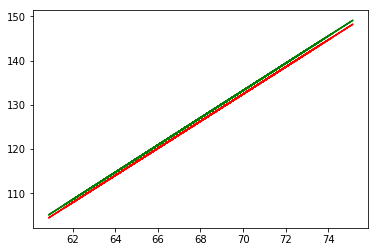

In [33]:
plt.plot(test_X,val,color='red')
plt.plot(test_X,pr,color='green')
plt.show()

#### Green line is the line by sklearn linear regression line
#### Red line is the line by tensorflow regression